# Popular Data Science Questions # 

## Introduction ##
This is my 11th Data Science Project in the Data Scientist Pathway of Dataquest. In this project I will be undergoing the following scenario:

"I'm working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

The task is to figure oute what is 'best' content to write about."

To answer this question, I will be starting by using information from the group of online websites which belong to Stack Exchange. Stack Exchange websites cover topics such as programming, mathematics, philosophy, and more. An one of their websites, Data Science Stack Exchange, covers data science questions. These websites function as boards in which members can post questions, ranging from beginner to advanced topics, in order to find answers which may not be easily answered or explained.  

Each post (or question) from a member has it's own tags which identify the material it concerns, such as "machine learning" or "python". The posts also show how many views and responses it has received, and importantly how many votes. Votes indicate to what extent other members find the post of interest. 

Using the Stack Exchange Data Explorer [SEDE](https://data.stackexchange.com/datascience/query/new) allows for using SQL  (Transact-SQL) exploration of the sites public data base. This means posts can be sorted and checked by scores, titles and tags. The most promising tables appears to be 'Posts', followed by 'Comments'. Looking at Posts will show what questions members find the most important, or which questions are asked most. Examining comments will show what comments are valued highest and can indicate type of information (basic vs in-depth) as well as topics.

## First Search ##

Our first SQL search is as follows:

SELECT ID, PostTypeID, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
  FROM posts
  WHERE PostTypeId = 1 and Year(CreationDate) = 2019

  
This isolates questions from 2019, and selects posts which are questions. From this query we are able to save the results to a CSV called "2019_questions.csv". With this database, we can now use the Pandas library in Python to examine it further.


In [1]:
#Load Packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])


In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


From the above, we can see that every column has values except for "FavoriteCount" which has many missing values. This column signifies whether a user "favorited" a post, making it easier to re-access for themselves. Missing values indicate that no member favorited the post and so these missing values can be replaced with "0".

In [3]:
questions = questions.fillna(0)

Above, it can also be noted that "Tags" are described as an "object" variable. We can see what this means:

In [4]:
questions["Tags"].head()

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

Above the tags are in the format of: <Tag1><Tag2><Tag3>...

This format isn't convenient, but the lines can be converted into a list of strings.

In [5]:
questions["Tags"] = questions["Tags"].str.replace("><", ",").str.replace("<|>", "").str.split(",")
questions["Tags"].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

Now that the tags have been seperated in lists, we can begin to examine the data for what we're looking for.

First, the tags can be tallied so as to determine how many times each tag was used. This will give a sense of how popular a topic is.

Next, we can take the views for each post, and identify how many times a tag was viewed to a connected post. This will better identify what tags are popular as it won't simply be how many posts are created with these tags, but how much interest it derives.


In [6]:
tag_counter = dict()

for tag_list in questions["Tags"]:
    for tag in tag_list:
        if tag in tag_counter:
            tag_counter[tag] += 1
        else:
            tag_counter[tag] = 1

In [7]:
len(tag_counter)



526

Above we see that there are 526 tags. If we were to plot a histogram, there would be too many tags to look at. See we are interested in popularity, it is possible to identify the top 15 tags.

In [8]:
tag_count = pd.DataFrame.from_dict(tag_counter, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.sort_values(by="Count", inplace=True, ascending=False)
top_15_tc = tag_count.head(15)
top_15_tc


,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

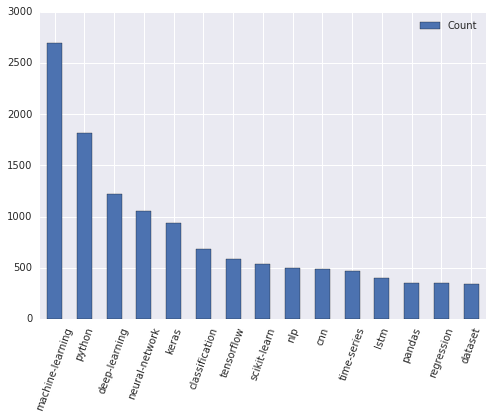

In [9]:
top_15_tc.plot.bar()
plt.xticks(rotation=70)


Now it's time to examine the views per tag


In [14]:
tag_counter_view = dict()

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_counter_view:
            tag_counter_view[tag] += row["ViewCount"]
        else:
            tag_counter_view[tag] = row["ViewCount"]
            
tag_counter_view = pd.DataFrame().from_dict(tag_counter_view, orient="index")
tag_counter_view.rename(columns={0: "Count"}, inplace=True)
tag_counter_view.sort_values(by="Count", inplace=True, ascending=False)
top_15_tc_view = tag_counter_view.head(15)
top_15_tc_view


,Count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

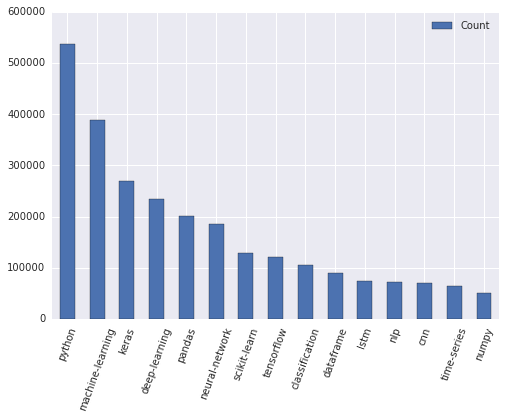

In [15]:
top_15_tc_view.plot.bar()
plt.xticks(rotation=70)